In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Task 1: Exploratory Data Analysis (EDA)

In [2]:
## 1. Load the Mushroom dataset and perform fundamental data exploration

In [3]:
df= pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.shape

(2000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
print("\nClass Distribution:\n", df['class'].value_counts())


Class Distribution:
 class
poisonous    1400
edible        600
Name: count, dtype: int64


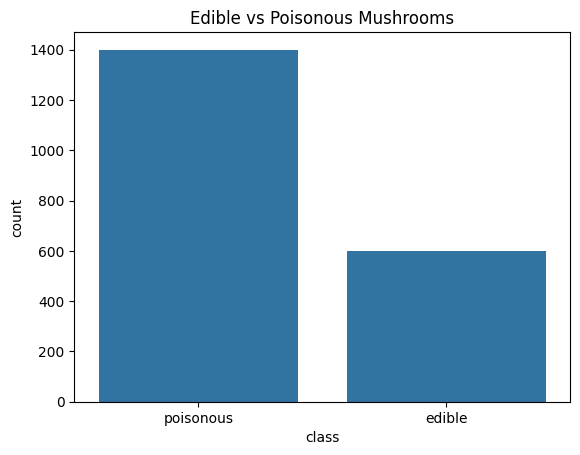

In [8]:
# Plot class distribution
sns.countplot(x='class', data=df)
plt.title("Edible vs Poisonous Mushrooms")
plt.show()

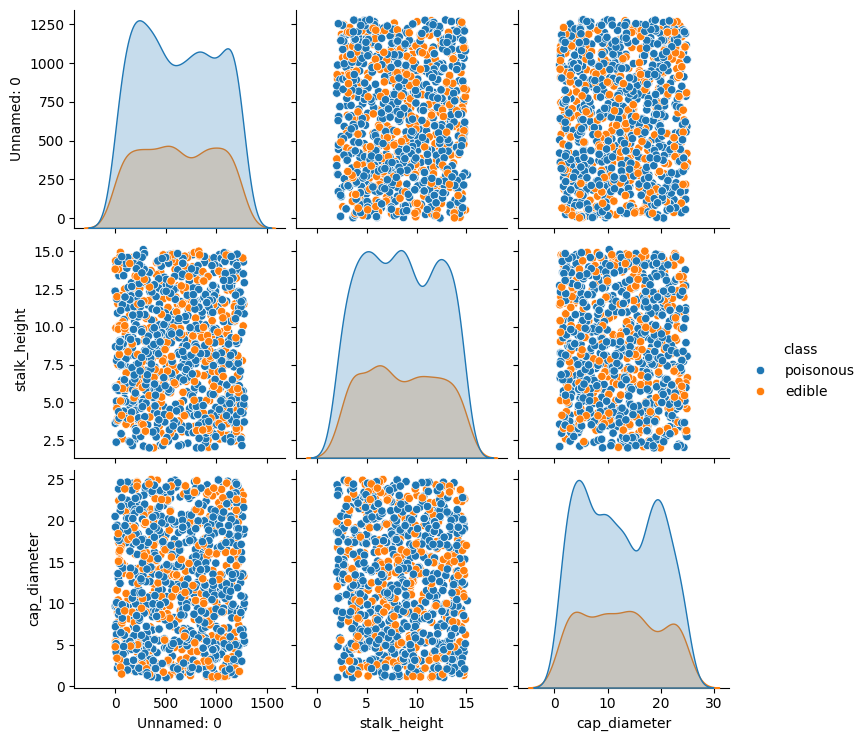

In [9]:
sns.pairplot(df, hue='class')
plt.show()

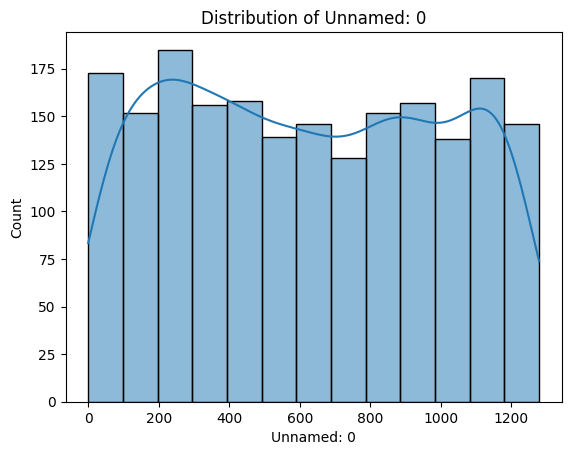

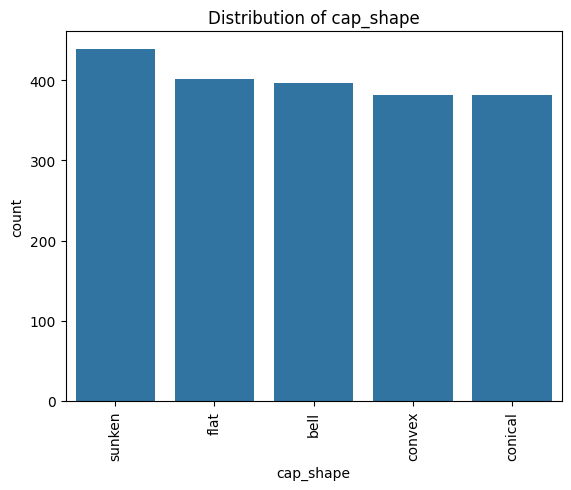

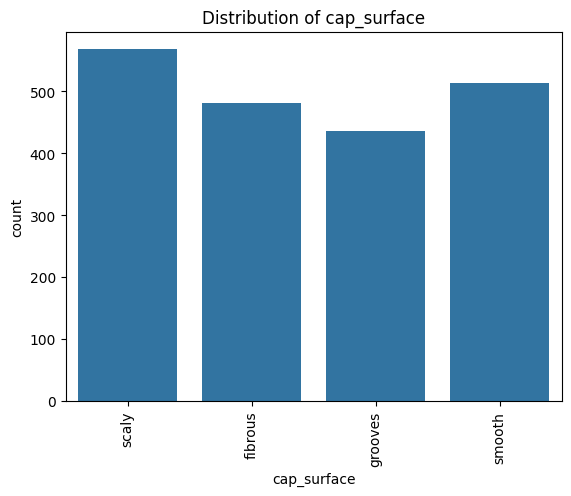

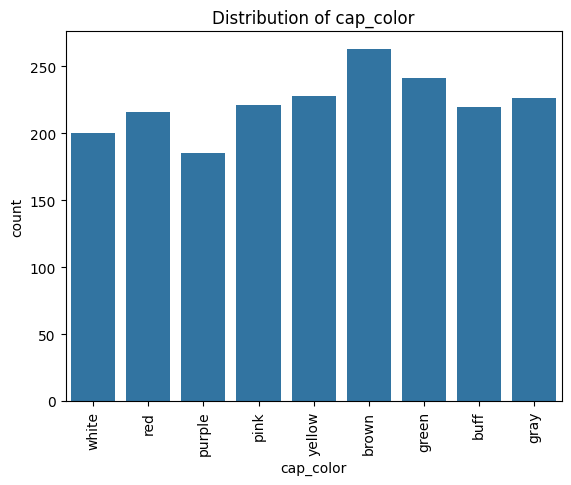

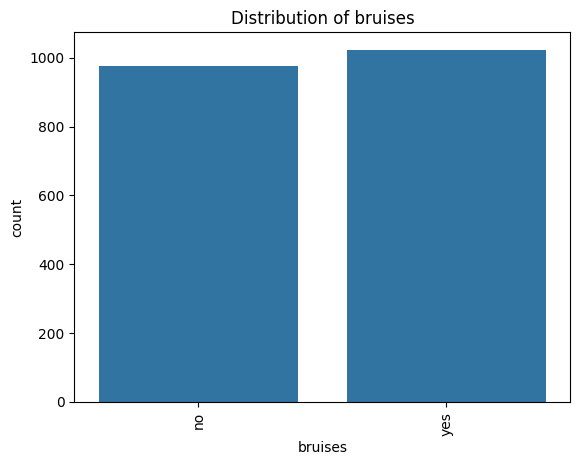

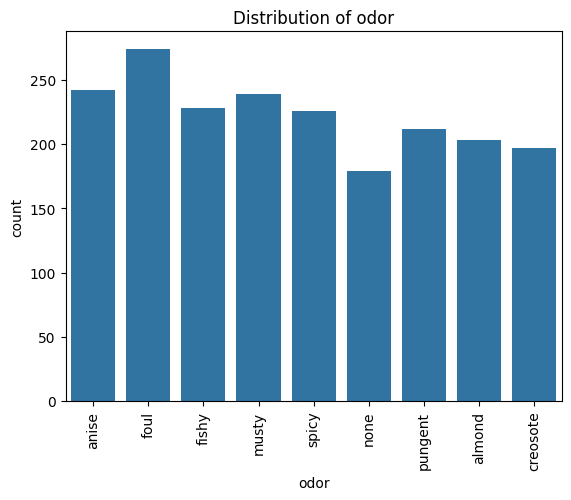

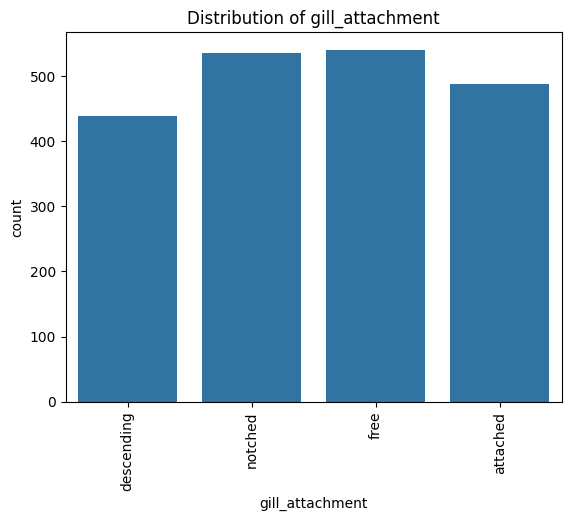

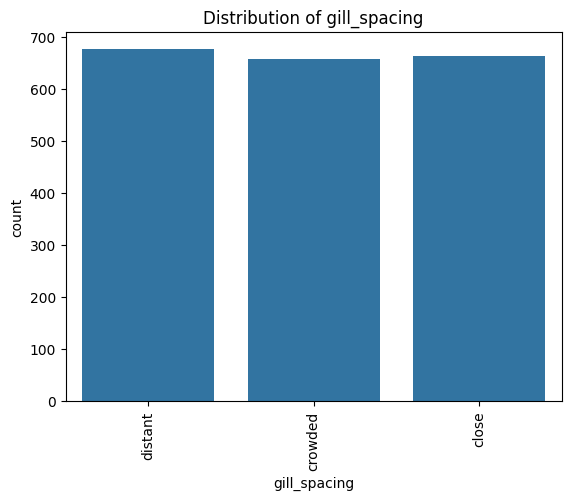

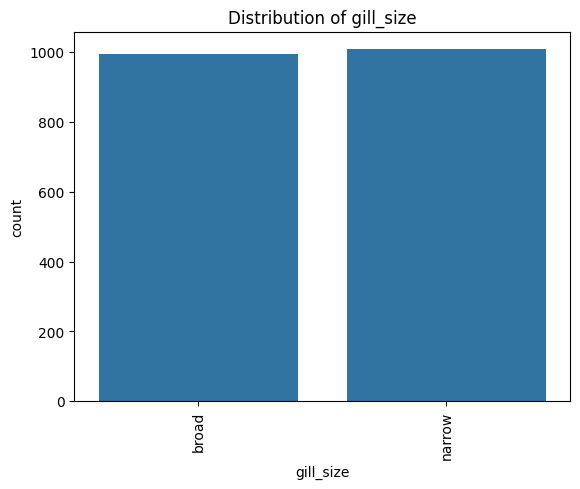

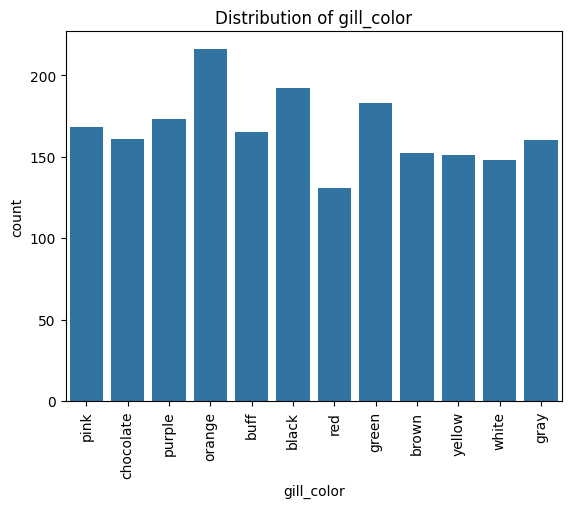

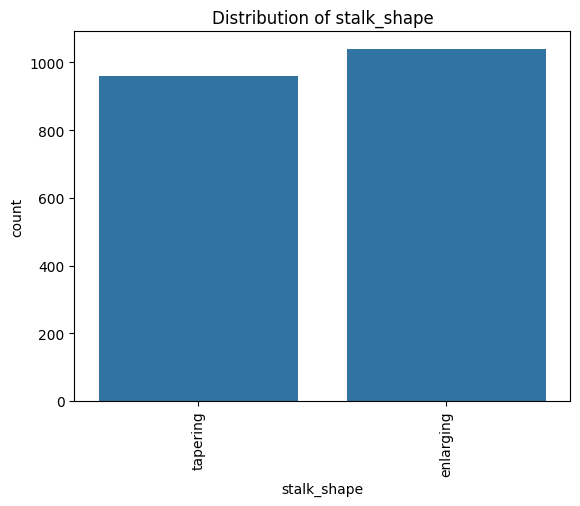

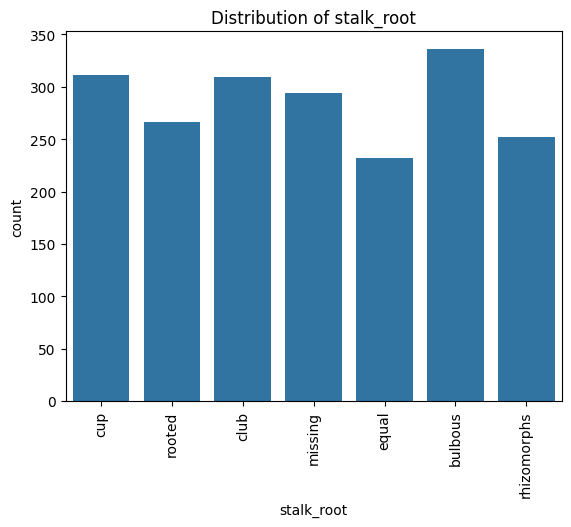

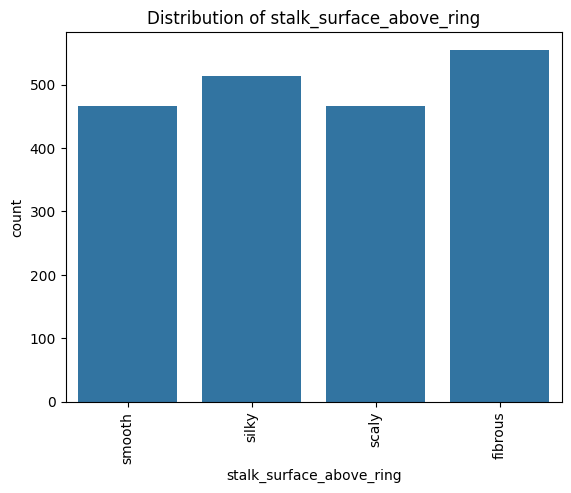

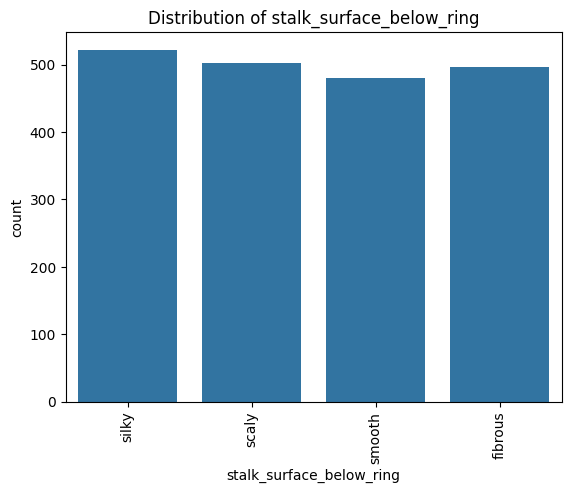

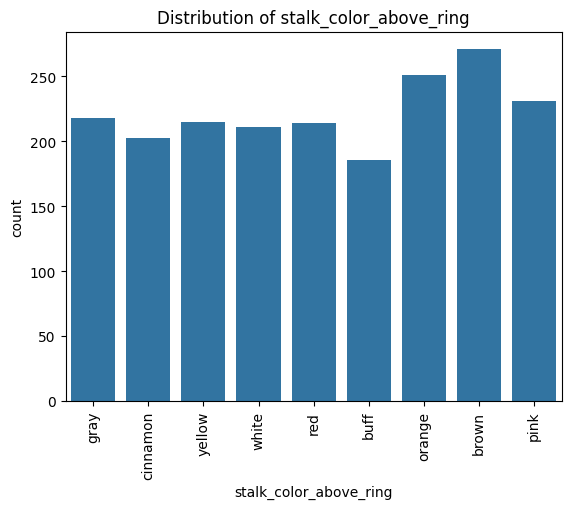

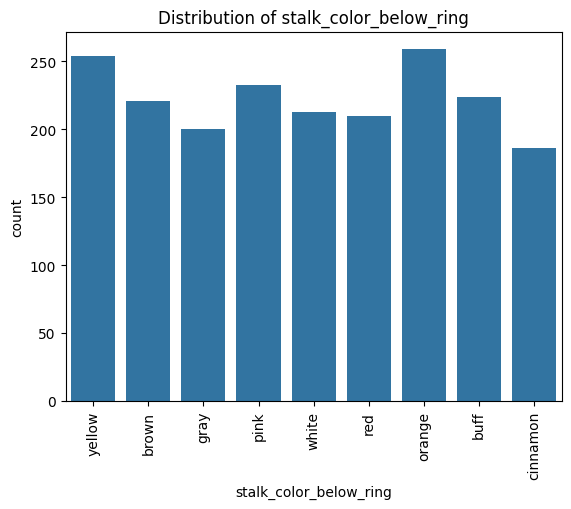

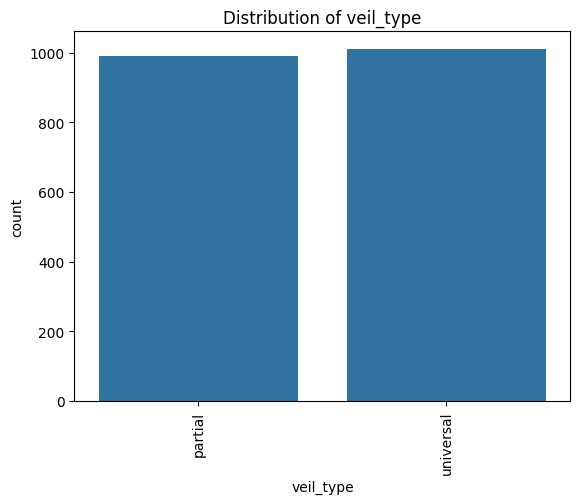

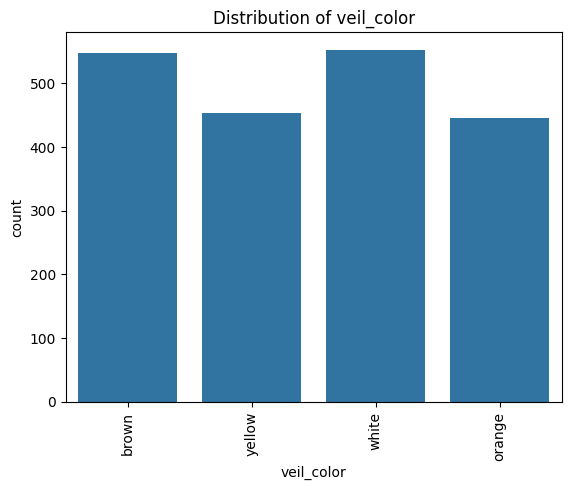

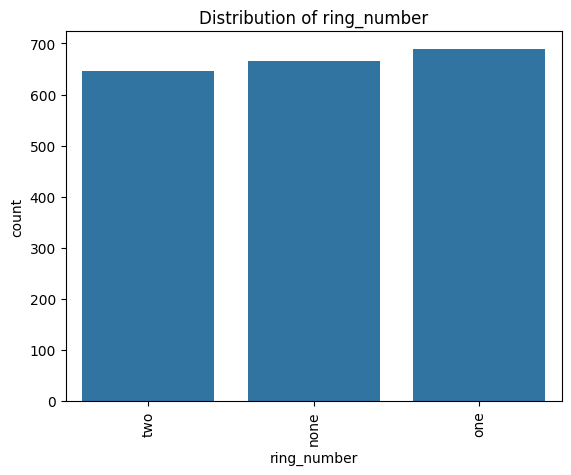

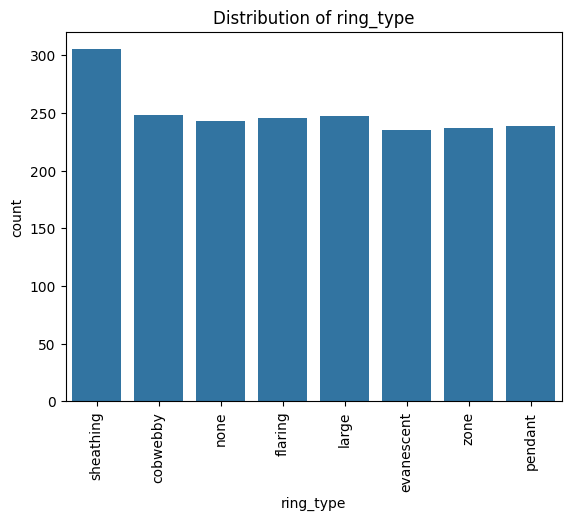

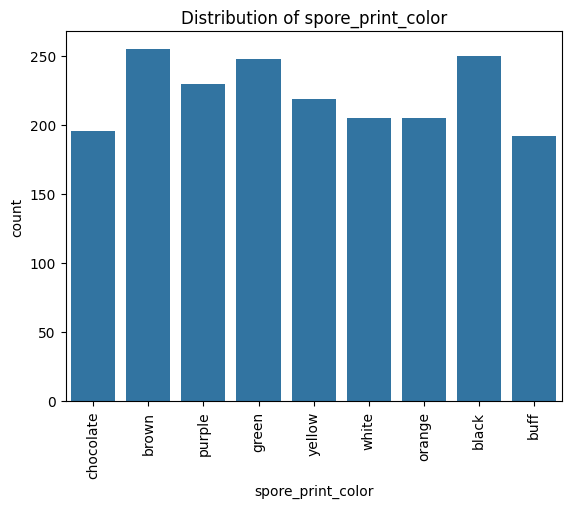

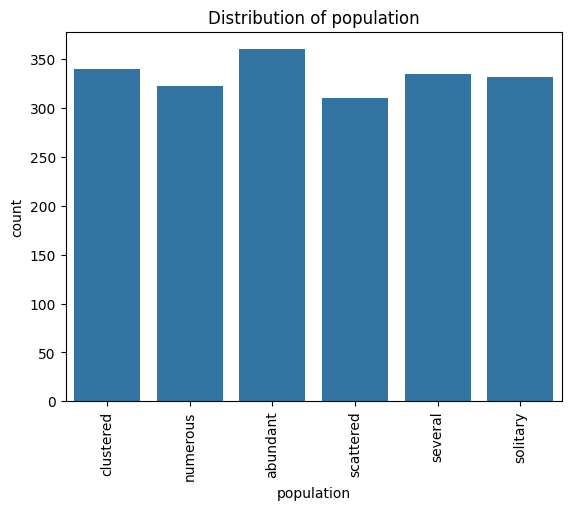

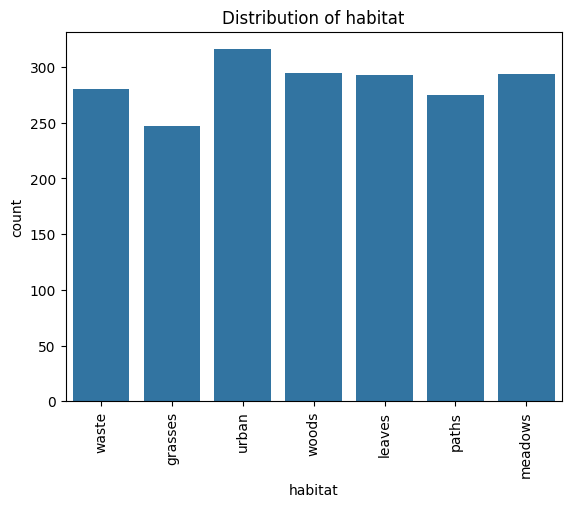

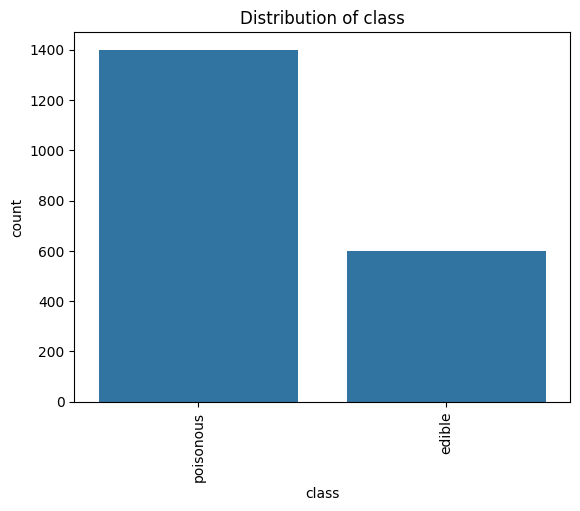

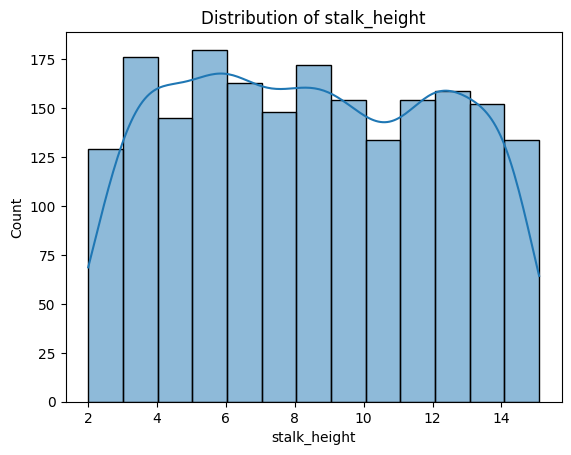

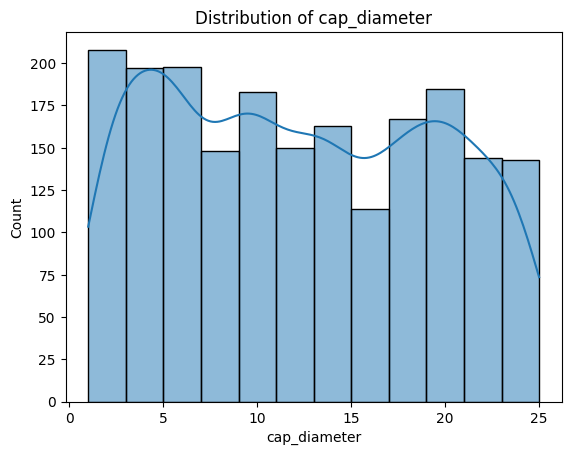

In [10]:
# Visualize feature distributions
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical feature
        sns.countplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()
    else:  # Numerical feature
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

## Task 2: Data Preprocessing

In [11]:
# Encode Categorical Features
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [12]:
encoded_df = pd.get_dummies(df, drop_first=True)
encoded_df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


## Task 3: Data Visualization

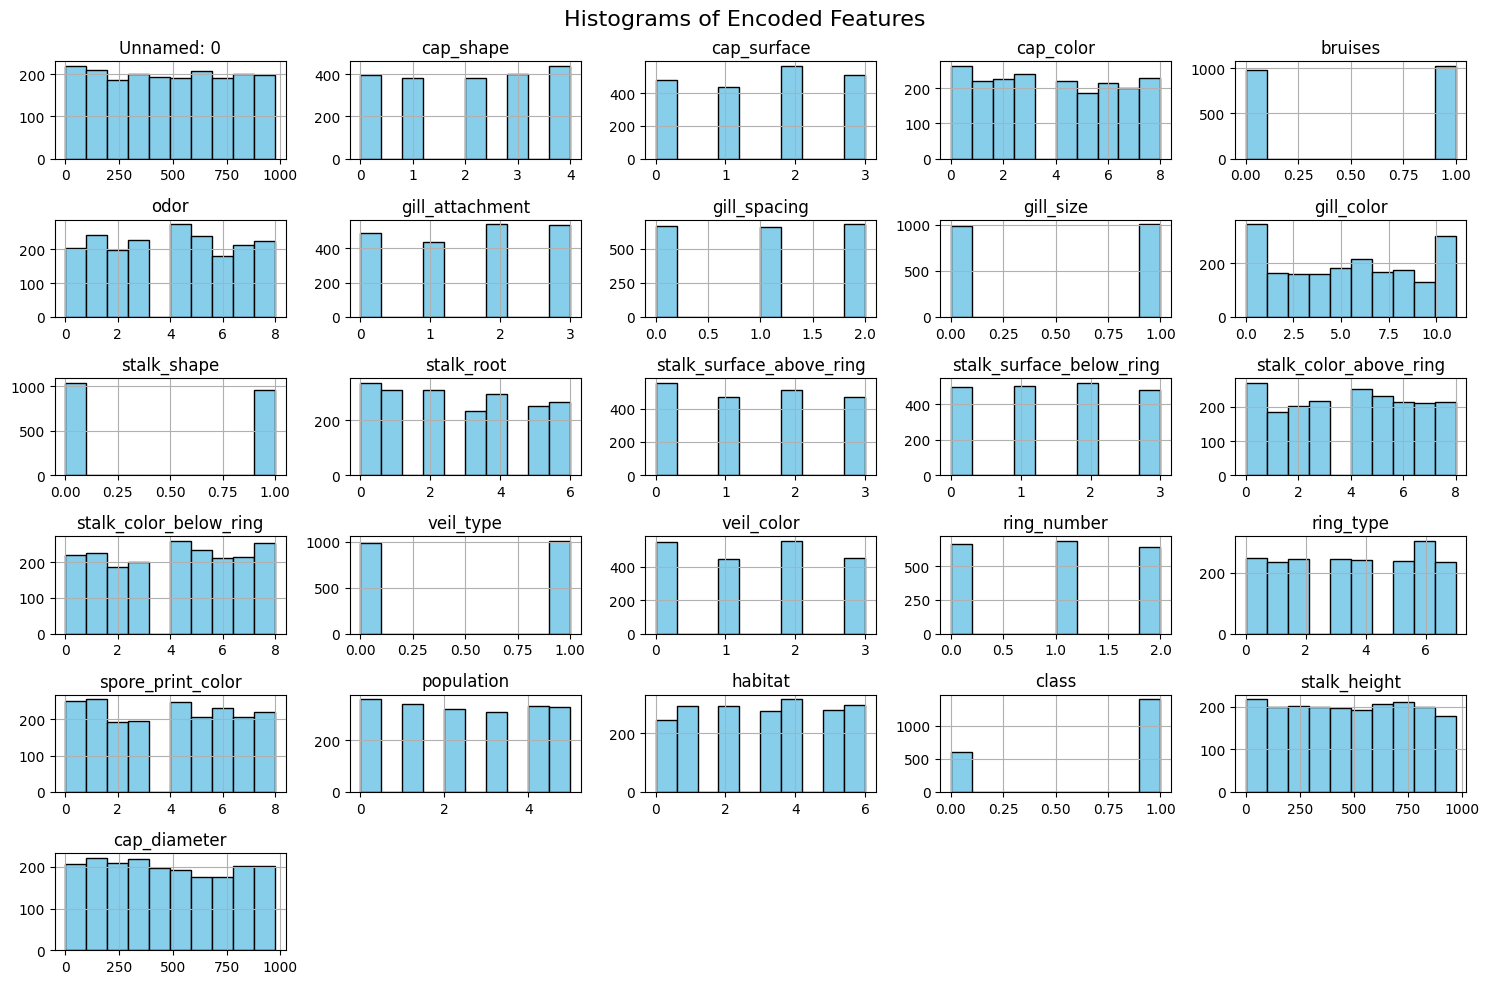

In [13]:
# Histograms (after encoding)
df_encoded = df.copy()
df_encoded.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Encoded Features", fontsize=16)
plt.tight_layout()
plt.show()

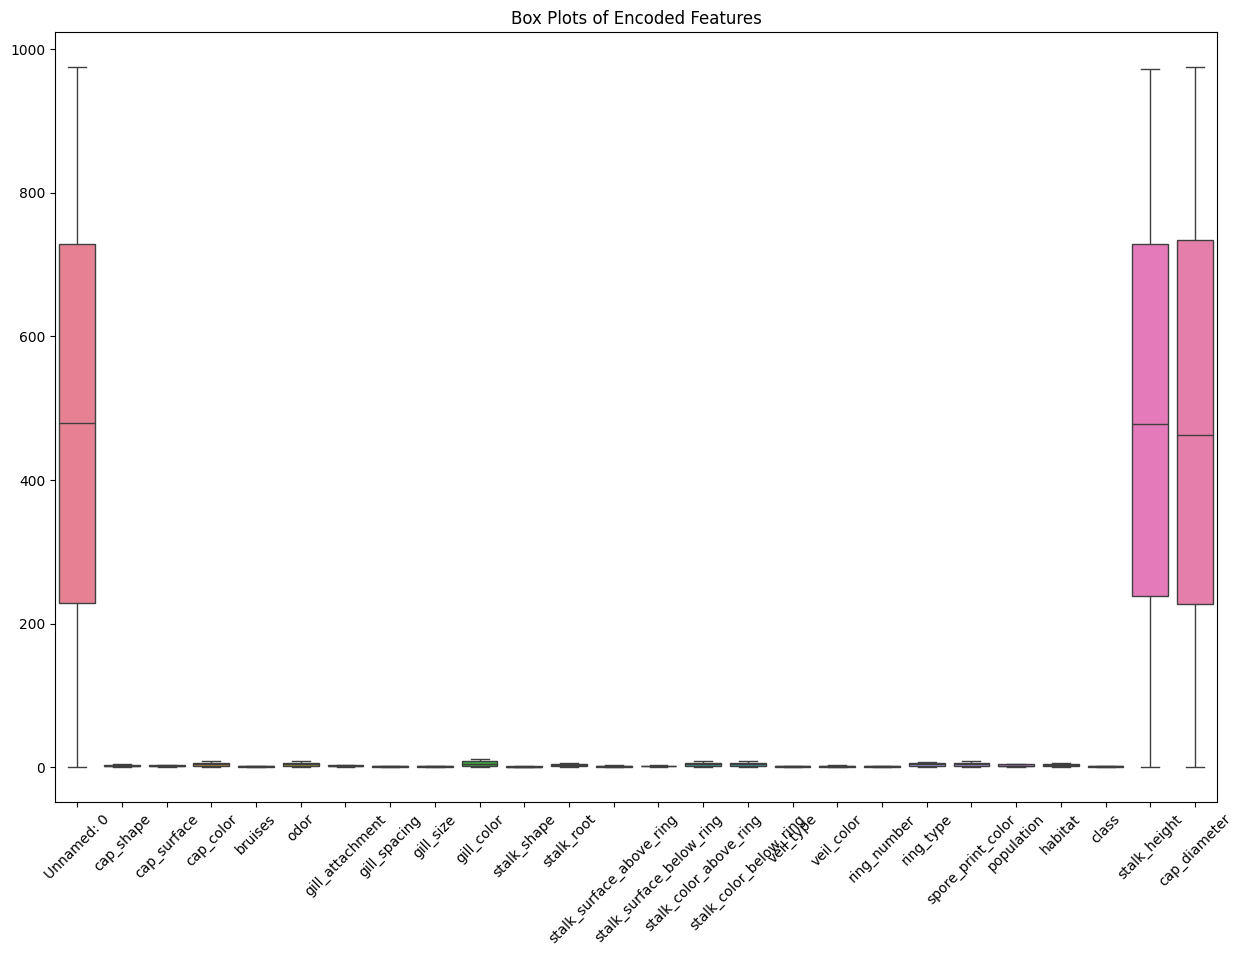

In [14]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_encoded)
plt.title("Box Plots of Encoded Features")
plt.xticks(rotation=45)
plt.show()

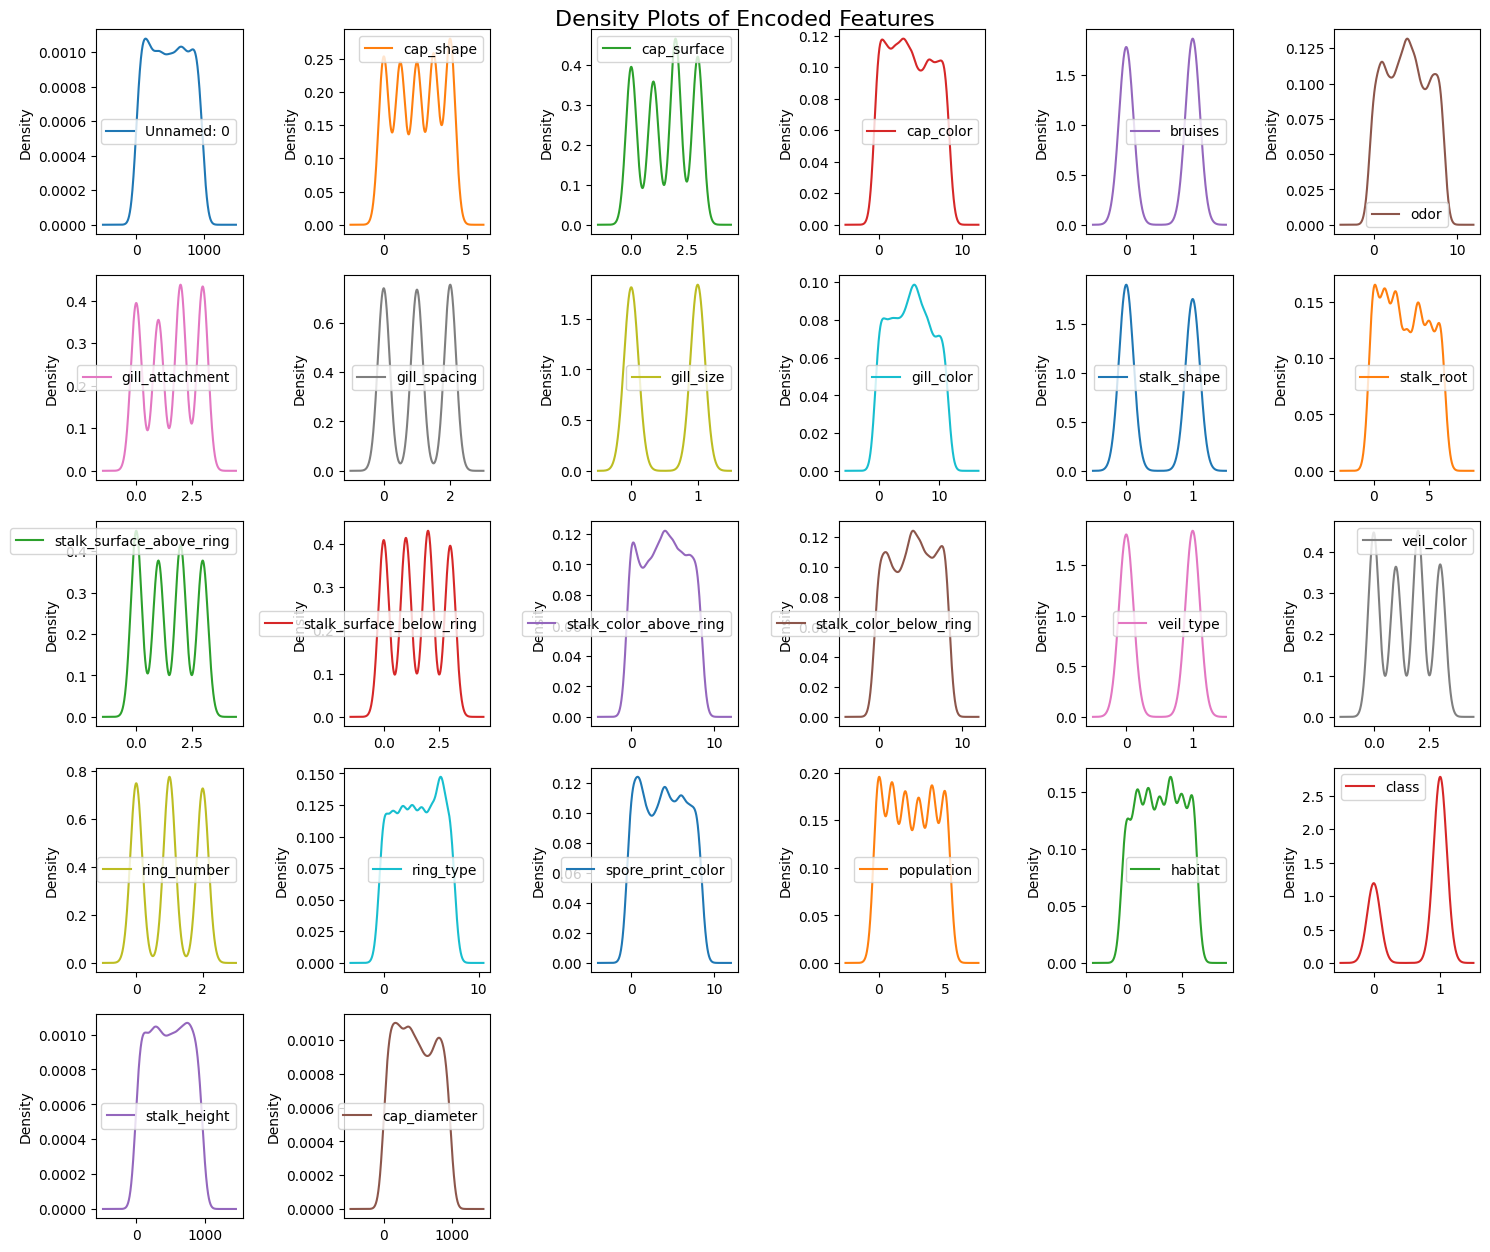

In [15]:
# Density (KDE) Plots
df_encoded.plot(kind='kde', subplots=True, layout=(6,6), figsize=(15, 15), sharex=False)
plt.suptitle("Density Plots of Encoded Features", fontsize=16)
plt.tight_layout()
plt.show()

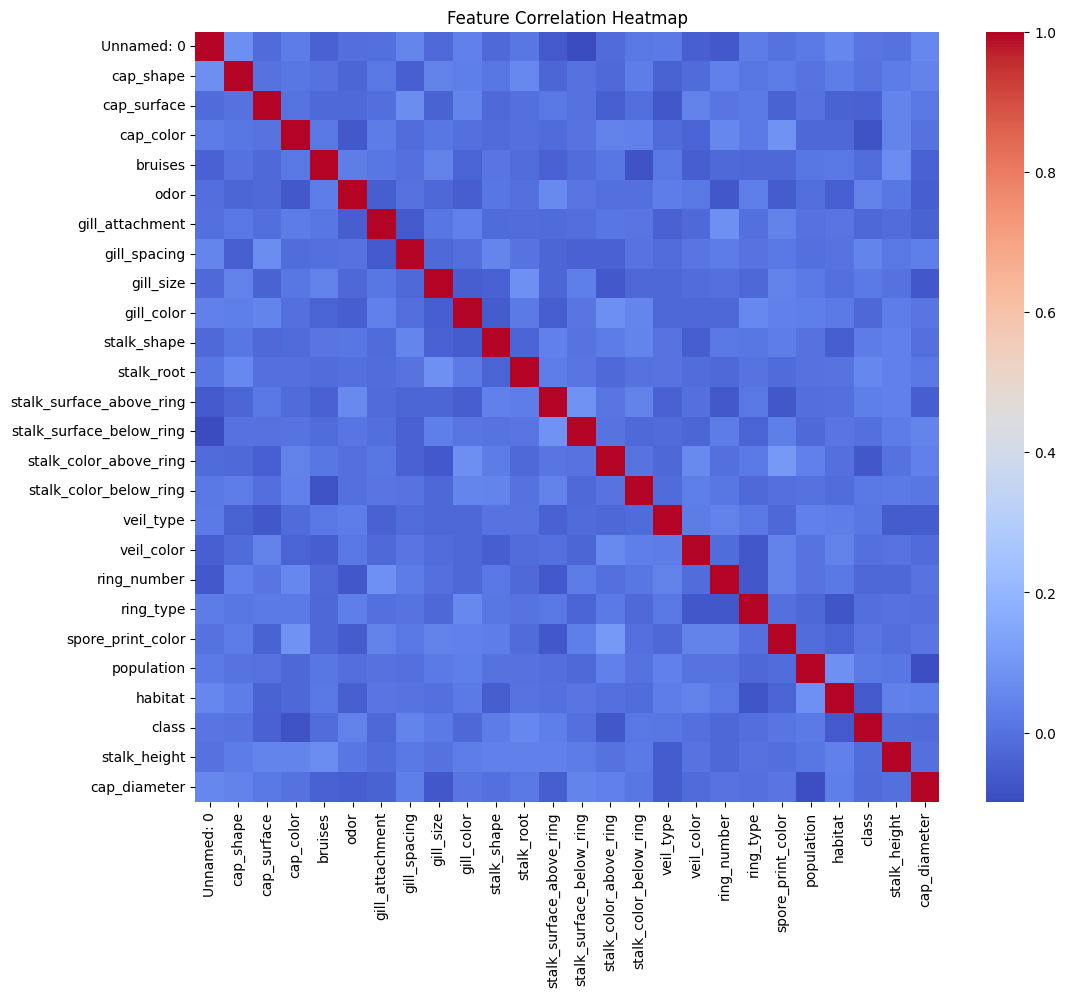

In [16]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
# Split dataset into training and testing sets
features = df_encoded.drop('Unnamed: 0', axis=1)  # Replace 'class_e' with the target column
target = df_encoded['Unnamed: 0']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 25)
(400, 25)
(1600,)
(400,)


## Task 4: SVM Implementation

In [18]:
svc=SVC(C=1,kernel='linear',gamma=0.1)
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [19]:
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.725

In [20]:
### Grid Search
params={'C':range(1,5),'kernel':['linear','poly','rbf','sigmoid'],'gamma':np.arange(0.1,0.3,0.1)}
params

{'C': range(1, 5),
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': array([0.1, 0.2])}

In [21]:
grid_search=GridSearchCV(svc,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=1, gamma=0.1, kernel='linear'),
             param_grid={'C': range(1, 5), 'gamma': array([0.1, 0.2]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
grid_search.best_params_

{'C': 1, 'gamma': np.float64(0.1), 'kernel': 'linear'}

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          28       0.00      0.00      0.00         0
          29       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          48       0.33      1.00      0.50         1
          51       0.00      0.00      0.00         1
          52       1.00      1.00      1

## Task 5: Visualization of SVM Results

In [24]:
# Assuming 2D projection for simplicity
# PCA can be applied for dimensionality reduction if needed
from sklearn.decomposition import PCA

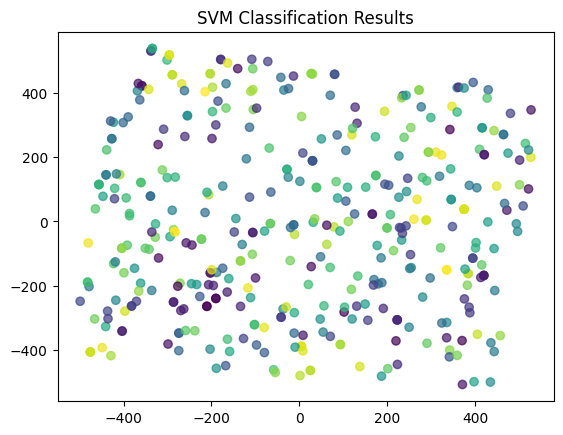

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title("SVM Classification Results")
plt.show()

## Task 6: Parameter Tuning and Optimization

In [26]:
# Experiment with different hyperparameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    print(f"Kernel: {kernel}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

Kernel: linear
Accuracy Score: 0.725
Kernel: poly
Accuracy Score: 0.0225
Kernel: rbf
Accuracy Score: 0.0075


## Task 7: Comparison and Analysis

In [27]:
# Analyze performance for different kernels
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((kernel, accuracy))

In [28]:
svm

SVC(random_state=42)

In [29]:
accuracy

0.0075

In [30]:
results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
results_df

,Kernel,Accuracy
0,linear,0.7250
1,poly,0.0225
2,rbf,0.0075


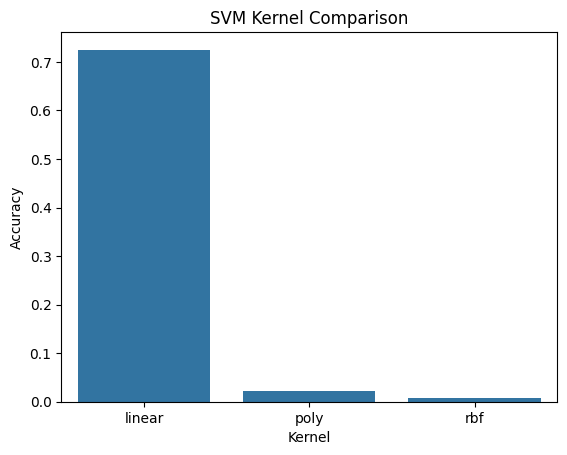

In [31]:
sns.barplot(data=results_df, x="Kernel", y="Accuracy")
plt.title("SVM Kernel Comparison")
plt.show()